In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "pc",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 172 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names

['HARDDISK', 'RAM', 'cables', 'cases', 'keyboard']

(32, 256, 256, 3)
[2 0 0 2 4 0 4 2 2 4 2 0 3 2 4 3 2 4 4 2 2 2 4 0 4 4 4 3 4 2 4 3]


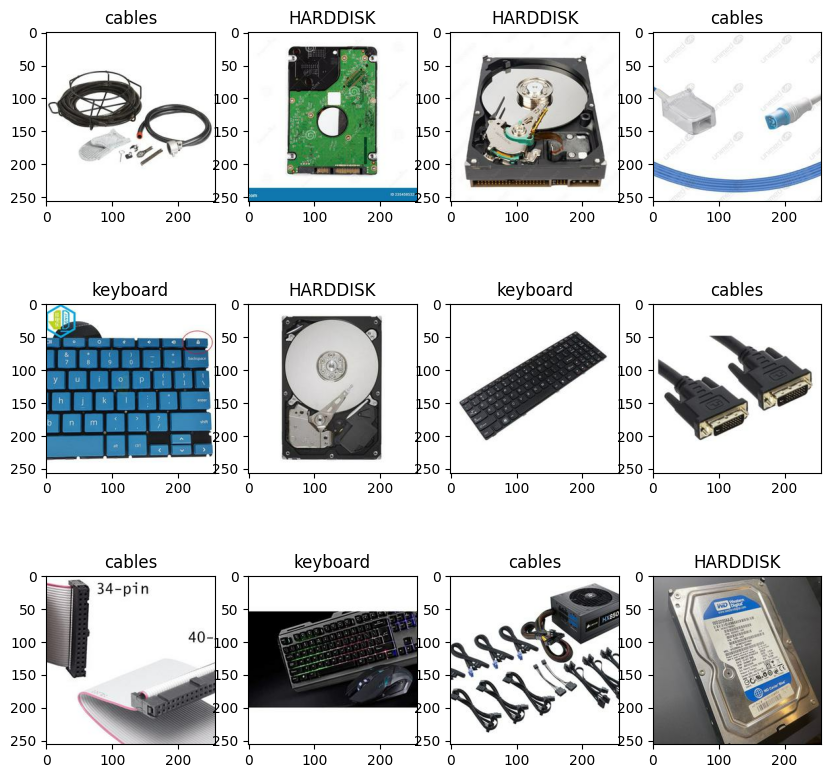

In [5]:
plt.figure(figsize=(10,10))
for image_batch, image_labels in dataset.take(1):
    print(image_batch.shape)
    print(image_labels.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch [i] . numpy() . astype("uint8"))
        plt.title(class_names[image_labels[i]])
        

In [6]:
train_size = 0.5
len(dataset) * train_size

3.0

In [7]:
train_ds = dataset.take(6)
len(train_ds)

6

In [8]:
test_ds = dataset.skip(0)
len(test_ds)

6

In [9]:
val_size = 0.1
len(dataset)* val_size

0.6000000000000001

In [10]:
val_ds = test_ds.take(0)
len(val_ds)

0

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [12]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    assert (train_split + val_split + test_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        train_size = int (train_split*ds_size)
        val_size = int(val_split*ds_size)
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size). take(val_size)
        test_ds = ds.skip(train_size). skip(val_size)  
    return train_ds, val_ds, test_ds


In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

4

In [15]:
len(val_ds)

0

In [16]:
len(test_ds)

2

In [17]:
train_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
for image_batch, image_labels in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classess=5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classess, activation='softmax'), 
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 20.2620 - accuracy: 0.2315
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 3.6432 - accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 12s 3s/step - loss: 1.8554 - accuracy: 0.3519
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 1.5017 - accuracy: 0.3438
Epoch 5/20
4/4 [==============================] - 12s 3s/step - loss: 1.4599 - accuracy: 0.4537
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 1.3795 - accuracy: 0.4688
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 1.3250 - accuracy: 0.4630
Epoch 8/20
4/4 [==============================] - 11s 3s/step - loss: 1.3605 - accuracy: 0.4444
Epoch 9/20
4/4 [==============================] - 11s 3s/step - loss: 1.3293 - accuracy: 0.5093
Epoch 10/20
4/4 [==============================] - 11s 3s/step - loss: 1.1535 - accuracy: 0.5370
Epoch 11/20
4/4 [=====================

In [25]:
scores =model.evaluate(test_ds)

2/2 [==============================] - 3s 884ms/step - loss: 0.9735 - accuracy: 0.7344


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [27]:
acc = history.history['accuracy']
loss = history.history['loss']


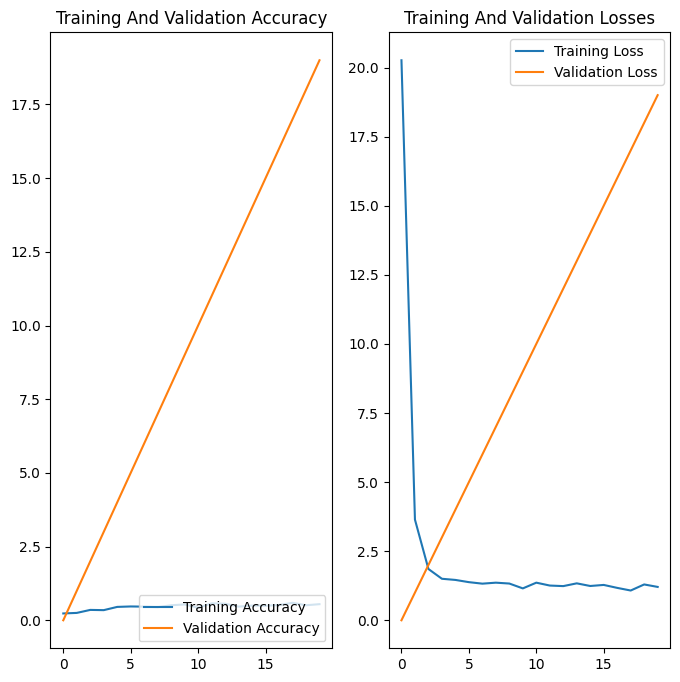

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS), label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Losses')
plt.show()

First Image to Predict
Actual Label: keyboard
1/1 [==============================] - 1s 1s/step
Predict Label: cables


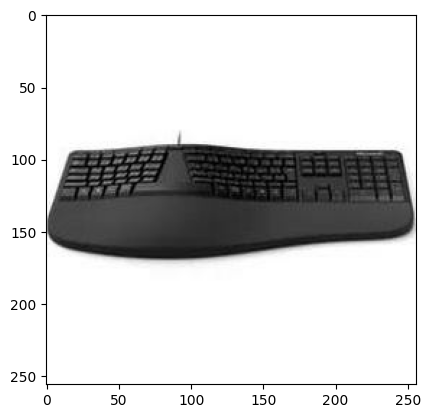

In [281]:
import numpy as np
for image_batch, image_labels in test_ds.take(1):
    first_image = image_batch[0]. numpy().astype("uint8")
    print('First Image to Predict')
    plt.imshow(first_image)
    print('Actual Label:',class_names[image_labels[0]. numpy()])
    
    batch_prediction = model.predict(image_batch)
    print('Predict Label:', class_names[np.argmax(batch_prediction[0])])
    

In [282]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 88ms/step


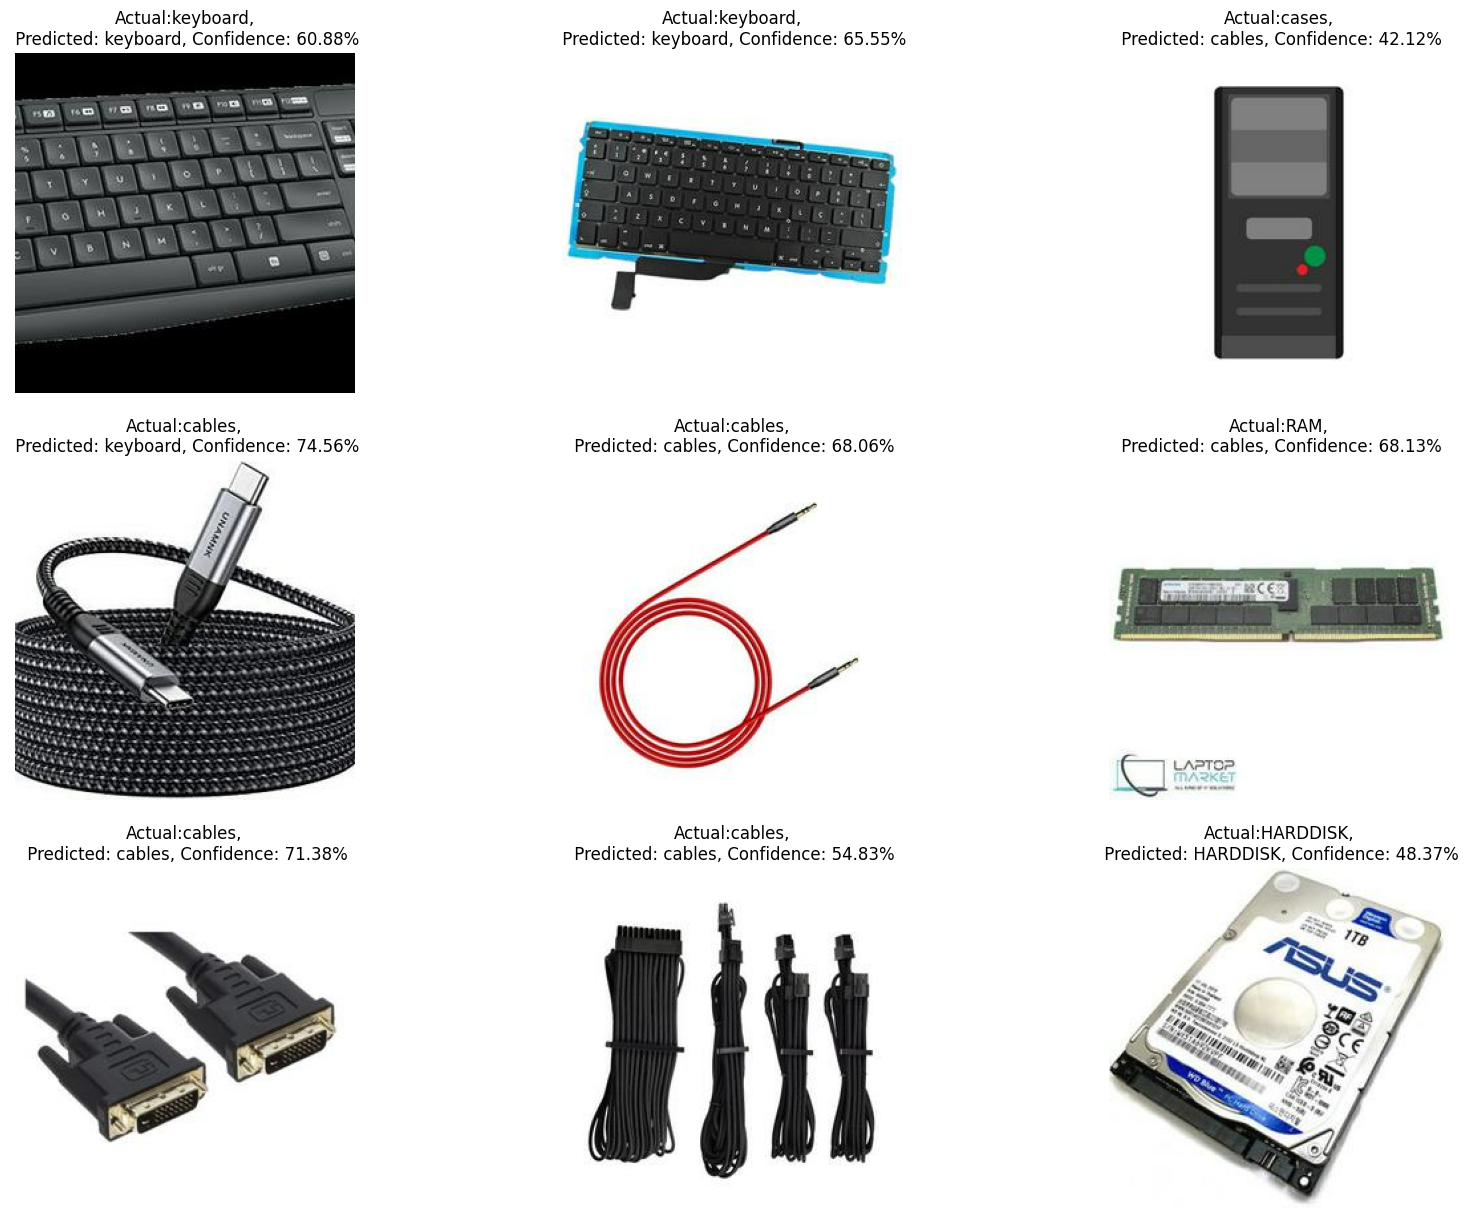

In [283]:
plt.figure(figsize=(20, 15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}, Confidence: {confidence}%")
        plt.axis('off')

In [285]:
model_version=1
model.save(f"../pc_models/{model_version}")

INFO:tensorflow:Assets written to: ../pc_models/1\assets


INFO:tensorflow:Assets written to: ../pc_models/1\assets
